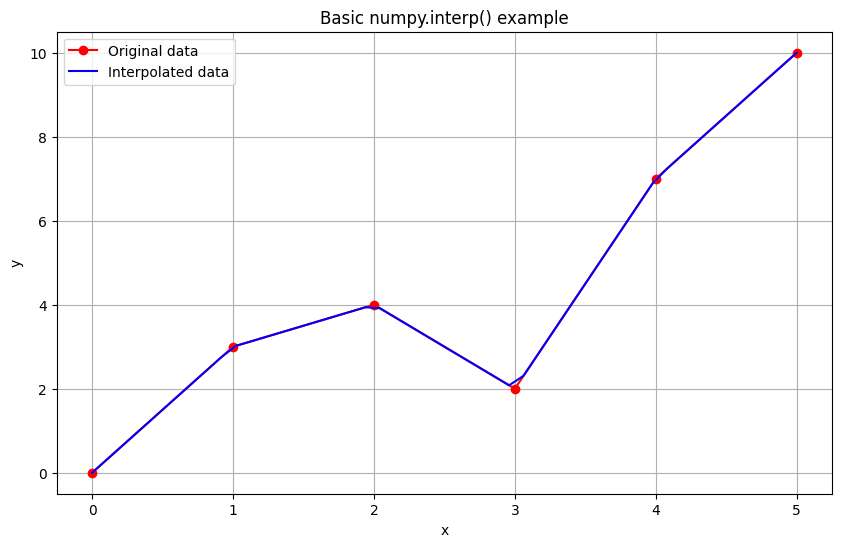

In [2]:
## Demonstrating numpy.interp() function

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

### Basic Usage of numpy.interp()

# Define known x and y values
x = numpy.array([0, 1, 2, 3, 4, 5])
y = numpy.array([0, 3, 4, 2, 7, 10])

# Define x values to interpolate
x_interp = numpy.linspace(0, 5, 50)

# Perform interpolation
y_interp = numpy.interp(x_interp, x, y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro-', label='Original data')
plt.plot(x_interp, y_interp, 'b-', label='Interpolated data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Basic numpy.interp() example')
plt.legend()
plt.grid(True)
plt.show()


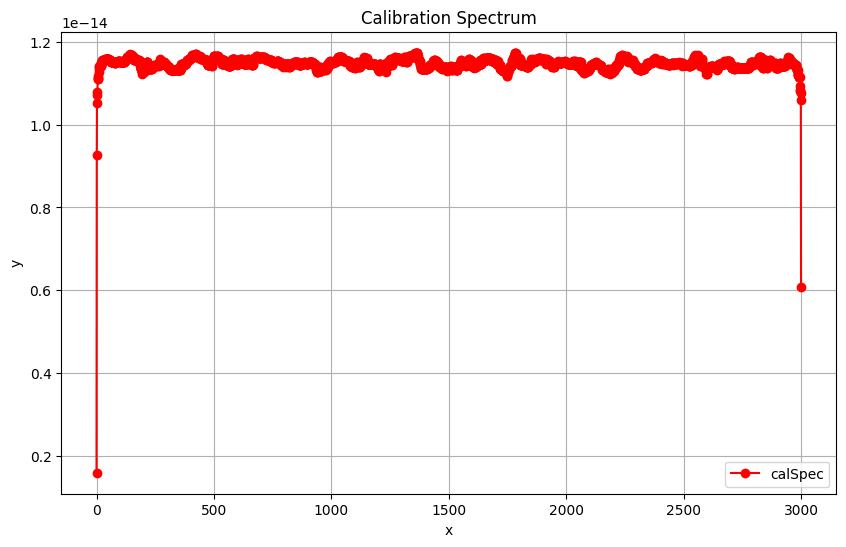

In [13]:
### test calibration spectrum interoplation
import scipy
from IMOSPATools import rawdat
from IMOSPATools import calibration
-90.0
fileName = "../scripts/501E9BF5.DAT"
calSpec, calFreq, fSample = calibration.loadPrepCalibFile(fileName, -90.0, -197.8)

# Plot the calibration spectrum
plt.figure(figsize=(10, 6))
plt.plot(calFreq, calSpec, 'ro-', label='calSpec')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Calibration Spectrum')
plt.legend()
plt.grid(True)
plt.show()


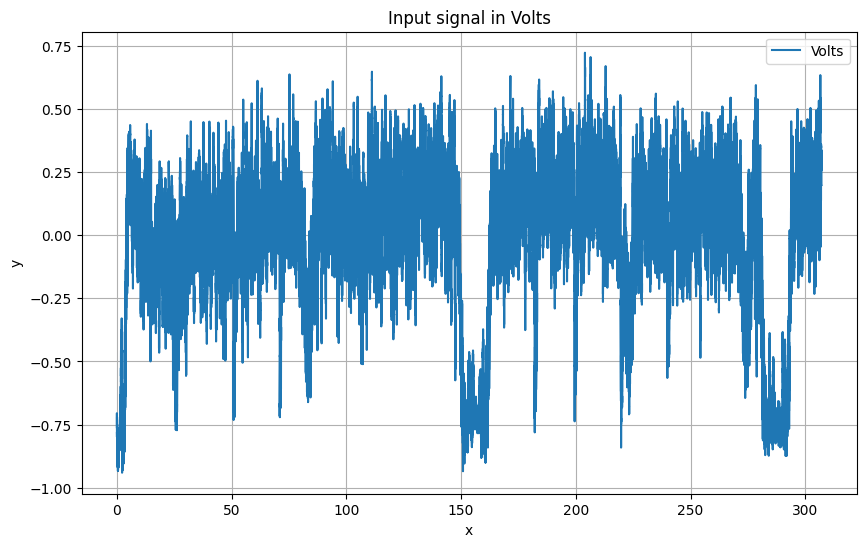

In [23]:
rawFileName = "../scripts/502DB01D.DAT"
binData, numChannels, sampleRate, durationHeader, \
        startTime, endTime = rawdat.readRawFile(rawFileName)
volts = calibration.toVolts(binData)

x = numpy.arange(0, (volts.size)/sampleRate, (1/sampleRate))

from scipy.ndimage import uniform_filter1d
# Calculate moving average
window_size = 1000  # Adjust this value to change the smoothing level
y_avg = uniform_filter1d(volts, size=window_size)

# Plot the Volts
plt.figure(figsize=(10, 6))
plt.plot(x, y_avg, linestyle='-', label='Volts')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Input signal in Volts')
plt.legend()
plt.grid(True)
plt.show()


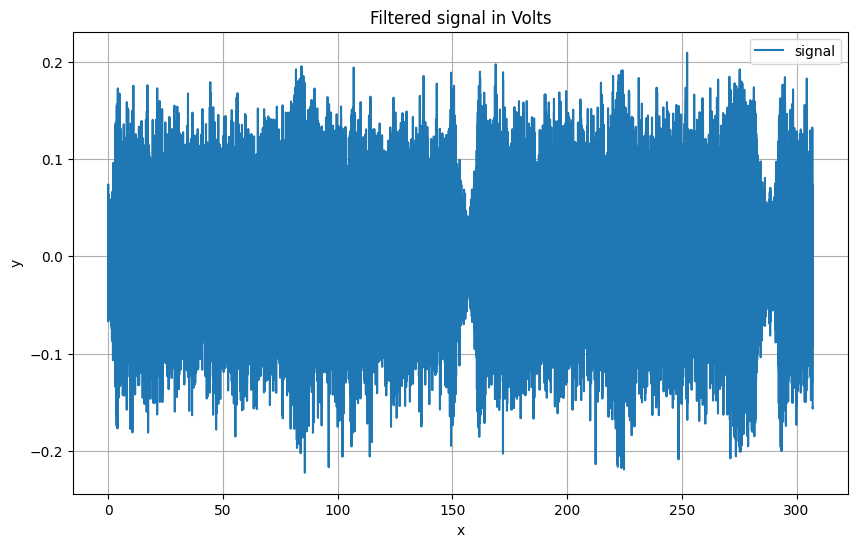

In [27]:
# make high-pass filter to remove slow varying DC offset
b, a = scipy.signal.butter(5, 5/fSample*2, btype='high', output='ba')
# apply the filter on the input signal
signal = scipy.signal.lfilter(b, a, volts)

y_avg = uniform_filter1d(signal, size=window_size)

# Plot the Volts
plt.figure(figsize=(10, 6))
plt.plot(x, y_avg, linestyle='-', label='signal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filtered signal in Volts')
plt.legend()
plt.grid(True)
plt.show()


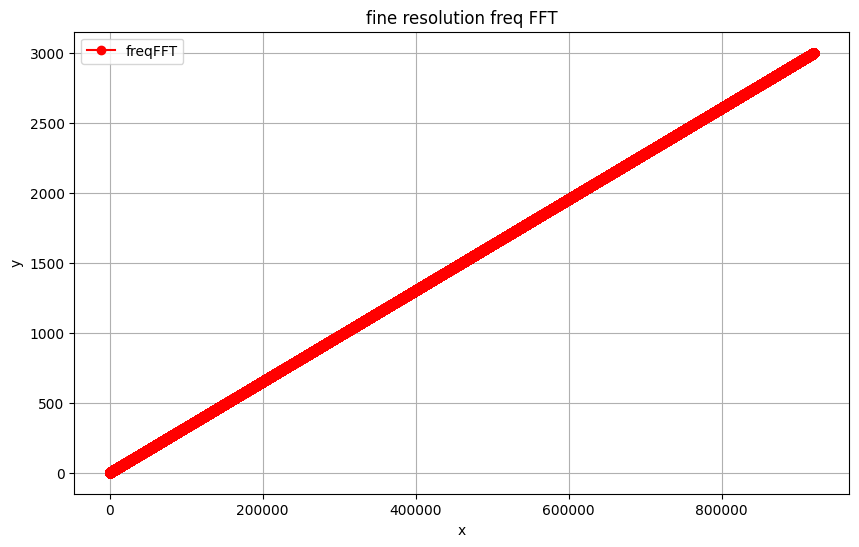

In [10]:
fmax = calFreq[len(calFreq) - 1]
df = fmax * 2 / len(signal)
# generate a set of frequencies as ndarray
freqFFT = numpy.arange(0, fmax + df, df)
x = numpy.arange(0, freqFFT.size, 1)

# Plot the freqFFT
plt.figure(figsize=(10, 6))
plt.plot(x, freqFFT, 'ro-', label='freqFFT')
plt.xlabel('x')
plt.ylabel('y')
plt.title('fine resolution freq FFT')
plt.legend()
plt.grid(True)
plt.show()

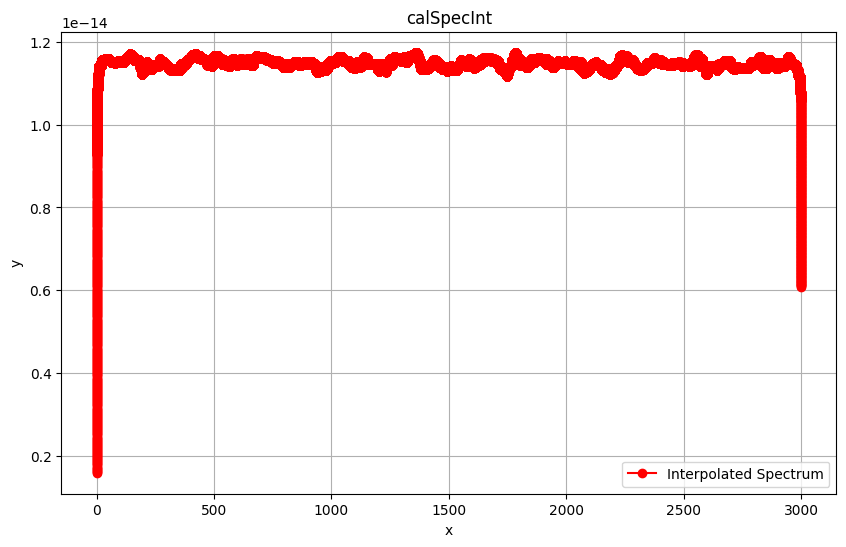

In [11]:
# MC note: the interpolation function numpy.interp() has a different
#          params order compared with matlab function interp1()
calSpecInt = numpy.interp(freqFFT, calFreq, calSpec)

# Plot the interpolated spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqFFT, calSpecInt, 'ro-', label='calSpecInt')
plt.xlabel('x')
plt.ylabel('y')
plt.title('calSpecInt')
plt.legend('Interpolated Spectrum')
plt.grid(True)
plt.show()


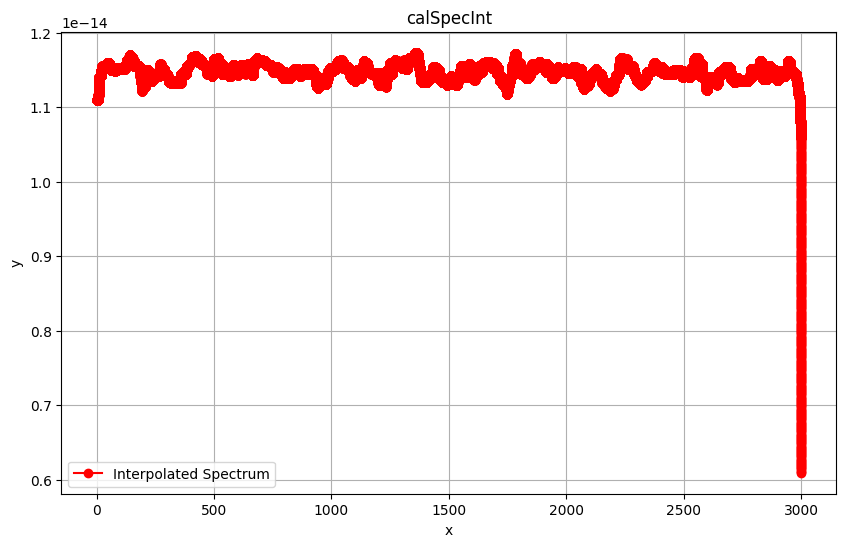

In [12]:
# Ignore calibration values below 5 Hz to avoid inadequate correction
N5Hz = numpy.where(freqFFT <= 5)[0]
calSpecInt[N5Hz] = calSpecInt[N5Hz[-1]]

# Plot the interpolated spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqFFT, calSpecInt, 'ro-', label='Interpolated Spectrum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('calSpecInt')
plt.legend()
plt.grid(True)
plt.show()